This is an environment test that includes the following steps:
- Installation of STP
- Running STP

STP is an efficient decision procedure for the validity (or satisfiability) of formulas from a quantifier-free many-sorted theory of fixed-width bitvectors and (non-extensional) one-dimensional arrays. The functions in STP’s input language include concatenation, extraction, left/right shift, sign-extension, unary minus, addition, multiplication, (signed) modulo/division, bitwise Boolean operations, if-then-else terms, and array reads and writes. The predicates in the language include equality and (signed) comparators between bitvector terms.

In [9]:
from bitwuzla import *

In [10]:
 # First, create a term manager instance.
tm = TermManager()
# Create a Bitwuzla options instance.
options = Options()
# Then, enable model generation.
options.set(Option.PRODUCE_MODELS, True)
# Create a Bitwuzla instance. 
bitwuzla = Bitwuzla(tm, options)

In [11]:
# Create bit-vector sorts of size 4 and 8.
sortbv4 = tm.mk_bv_sort(4)
sortbv8 = tm.mk_bv_sort(8)
# Create function sort.
sortfun = tm.mk_fun_sort([sortbv8, sortbv4], sortbv8)
# Create array sort.
sortarr = tm.mk_array_sort(sortbv8, sortbv8)

# Create two bit-vector constants of that sort.
x = tm.mk_const(sortbv8, "x")
y = tm.mk_const(sortbv8, "y")
# Create fun const.
f = tm.mk_const(sortfun, "f")
# Create array const.
a = tm.mk_const(sortarr, "a")
# Create bit-vector values one and two of the same sort.
one = tm.mk_bv_one(sortbv8)
# Alternatively, you can create bit-vector value one with:
# one = tm.mk_bv_value(sortbv8, "1", 2)
# one = tm.mk_bv_value(sortbv8, 1)
two = tm.mk_bv_value(sortbv8, 2)

# (bvsdiv x (_ bv2 8))
sdiv = tm.mk_term(Kind.BV_SDIV, [x, two])
# (bvashr y (_ bv1 8))
ashr = tm.mk_term(Kind.BV_ASHR, [y, one])
# ((_ extract 3 0) (bvsdiv x (_ bv2 8)))
sdive = tm.mk_term(Kind.BV_EXTRACT, [sdiv], [3, 0])
# ((_ extract 3 0) (bvashr x (_ bv1 8)))
ashre = tm.mk_term(Kind.BV_EXTRACT, [ashr], [3, 0])

# (assert
#     (distinct
#         ((_ extract 3 0) (bvsdiv x (_ bv2 8)))
#         ((_ extract 3 0) (bvashr y (_ bv1 8)))))
bitwuzla.assert_formula(tm.mk_term(Kind.DISTINCT, [sdive, ashre]))
# (assert (= (f x ((_ extract 6 3) x)) y))
bitwuzla.assert_formula(tm.mk_term(
    Kind.EQUAL,
    [tm.mk_term(Kind.APPLY, [f, x, tm.mk_term(Kind.BV_EXTRACT, [x], [6, 3])]),
        y]))
# (assert (= (select a x) y))
bitwuzla.assert_formula(
    tm.mk_term(Kind.EQUAL, [tm.mk_term(Kind.ARRAY_SELECT, [a, x]), y]))

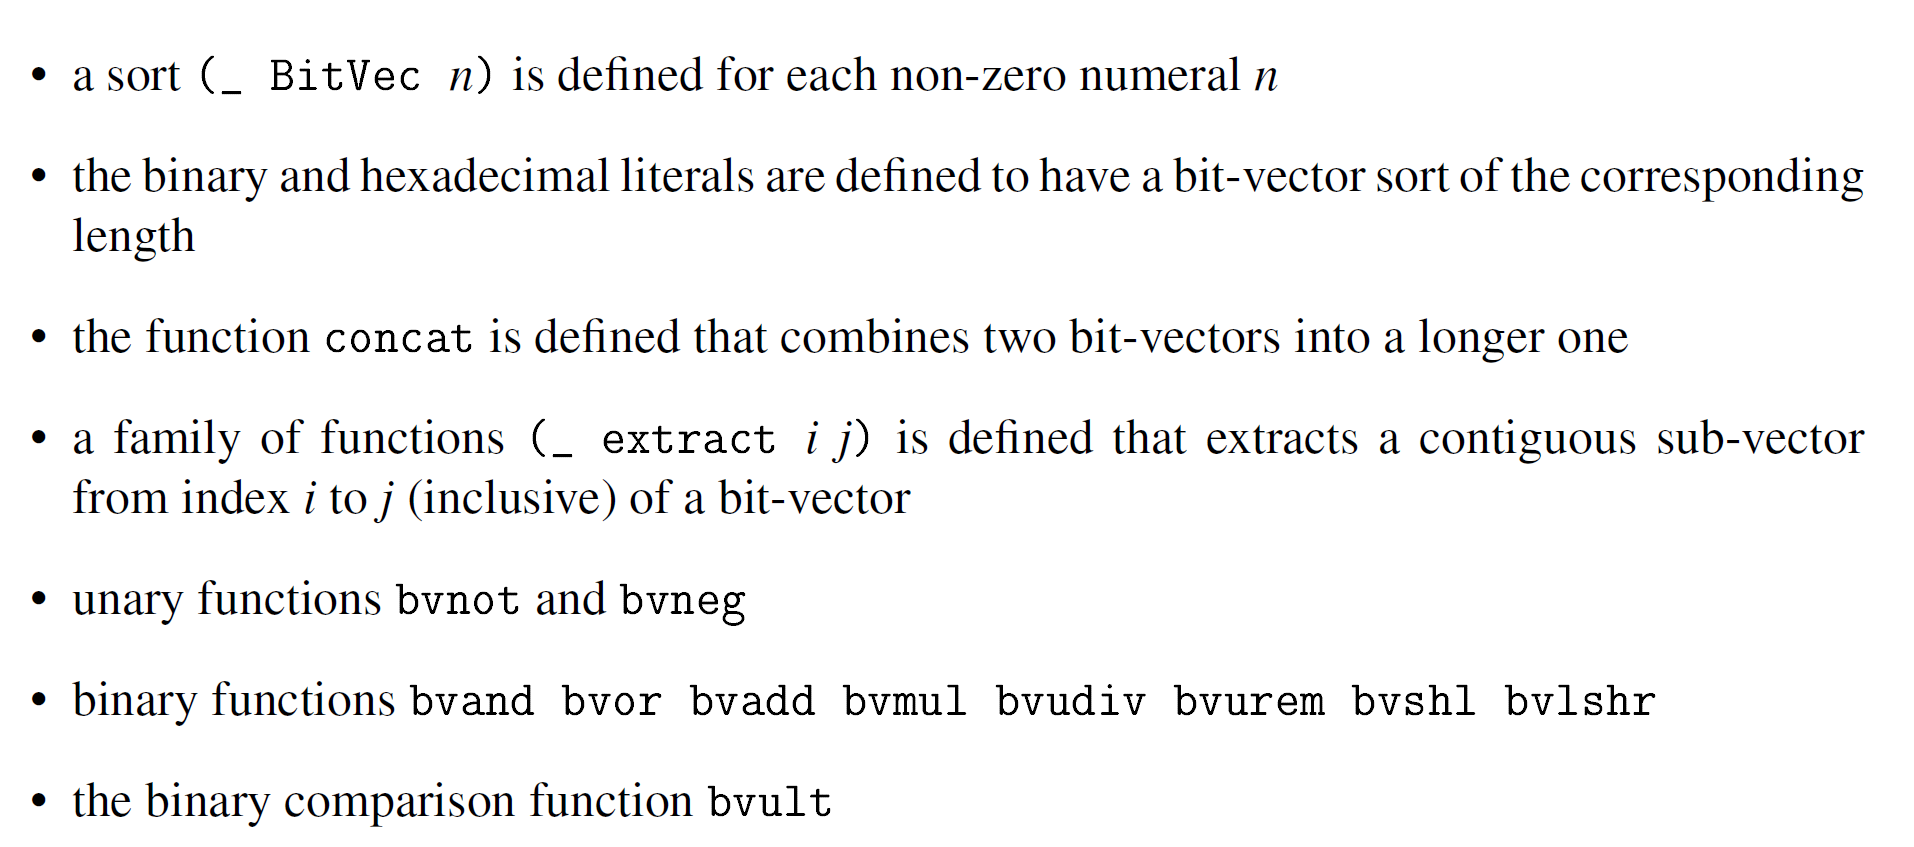

In [12]:
assertions = bitwuzla.get_assertions()
print('Assertions:')
print('{')
for a in assertions:
    print(f' {a}')
print('}')

Assertions:
{
 (distinct ((_ extract 3 0) (bvsdiv x #b00000010)) ((_ extract 3 0) (bvashr y #b00000001)))
 (= (f x ((_ extract 6 3) x)) y)
 (= (select a x) y)
}


In [17]:
result = bitwuzla.check_sat()

AttributeError: 'bitwuzla.Bitwuzla' object has no attribute 'set_option'

In [14]:
# Print model in SMT-LIBv2 format.
print('Model:\n(')
for term in [x, y, f, a]:
    sort = term.sort()
    symbol = term.symbol()
    print(f'  (define-fun {symbol if symbol else "@t" + str(term.id())} (',
            end = '')
    if sort.is_fun():
        value = bitwuzla.get_value(term)
        assert value.kind() == Kind.LAMBDA
        assert value.num_children() == 2
        while value[1].kind() == Kind.LAMBDA:
            assert value[0].is_variable()
            print(f'({value[0]} {value[0].sort()}) ',
                    end = '')
            value = value[1]
        assert value[0].is_variable()
        print(f'({value[0]} {value[0].sort()})) ' \
                + f'{sort.fun_codomain()} {value[1]})')
    else:
        print(f') {sort} {bitwuzla.get_value(term).value(2)})')
print(')')
print()

Model:
(
  (define-fun x () (_ BitVec 8) 10011111)
  (define-fun y () (_ BitVec 8) 11111111)
  (define-fun f ((@bzla.var_71 (_ BitVec 8)) (@bzla.var_72 (_ BitVec 4))) (_ BitVec 8) (ite (and (= @bzla.var_71 #b10011111) (= @bzla.var_72 #b0011)) #b11111111 #b00000000))
  (define-fun @t16 () Bool True)
)



In [15]:
parser = Parser(tm, options)
parser.parse("./smt2/practices.smt2")

sat
(
  (define-fun x0 () (_ BitVec 4) #b0011)
  (define-fun x1 () (_ BitVec 4) #b0101)
  (define-fun y0 () (_ BitVec 4) #b0100)
  (define-fun y1 () (_ BitVec 4) #b0110)
  (define-fun t0 () (_ BitVec 4) #b0110)
  (define-fun t1 () (_ BitVec 4) #b0100)
  (define-fun q0 () (_ BitVec 4) #b0101)
  (define-fun q1 () (_ BitVec 4) #b0011)
  (define-fun q2 () (_ BitVec 4) #b0110)
  (define-fun q3 () (_ BitVec 4) #b0101)
  (define-fun gt0 () (_ BitVec 4) #b0110)
  (define-fun gt1 () (_ BitVec 4) #b0001)
)
((x0 #b0011))


In [16]:
x1 = 0b0011
x2 = 0b0101
y1 = (x1 ^ x2) & x2
y2 = x1 ^ x2
print(f'bin(y1) bin(y2) = {bin(y1)} {bin(y2)}')
print(bin((0b0011 ^ 0b0101) & 0b0101) )

bin(y1) bin(y2) = 0b100 0b110
0b100
